# Bag of Words Meets Bags of Popcorn

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("dataset/unlabeledTrainData.tsv",sep = "\t",error_bad_lines=False)
df

/headless/anaconda3/envs/pytorch/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 43043: expected 2 fields, saw 3\n'


,id,review
0,9999_0,"Watching Time Chasers, it obvious that it was ..."
1,45057_0,I saw this film about 20 years ago and remembe...
2,15561_0,"Minor Spoilers<br /><br />In New York, Joan Ba..."
3,7161_0,I went to see this film with a great deal of e...
4,43971_0,"Yes, I agree with everyone on this site this m..."
...,...,...
49993,18984_0,The original Man Eater by Joe D'Amato is somew...
49994,16433_0,When Home Box Office was in it's early days mo...
49995,16006_0,Griffin Dunne was born into a cultural family....
49996,40155_0,"Not a bad story, but the low budget rears its ..."


## Utils

In [2]:
#utils
import torch
import numpy as np
import pandas as pd
import torch.optim as optim
import torch.nn.functional as F


label_train_path = "dataset/labeledTrainData.tsv"
unlabel_train_path = "dataset/unlabeledTrainData.tsv"
test_path = "dataset/testData.tsv"

def load_training_data(path='labeledTrainData.tsv'):  
    #global x,y
    # 把training时需要的data打开
    # 如果是'training_labe|l.txt'，需要获取label，如果是'training_nolabel.txt'，不需要获取label
    if(path == "dataset/labeledTrainData.tsv"):
        df = pd.read_csv("dataset/labeledTrainData.tsv",sep = "\t")
        #display(df.head())
        x = df['review'].apply(lambda x: x.strip().split(" "))
        x = list(x)
        y = df["sentiment"]  #二维的list
        y = list(y)   #一维的list
        return x, y
    else:
        df = pd.read_csv("dataset/unlabeledTrainData.tsv",sep = "\t",error_bad_lines=False)
        x = df['review'].apply(lambda x: x.strip().split(" "))
        x = list(x)
        return x

def load_testing_data(path='dataset/testData.tsv'):   #约55万
    # 把testing時需要的data讀進來
    df = pd.read_csv("dataset/testData.tsv",sep = "\t")
    #display(df.head())
    x = df['review'].apply(lambda x: x.strip().split(" "))
    x = list(x)
    return x  # X形如[["i","am","here"], ["he","loves","it"]]

def evaluation(outputs, labels):
    #outputs => probability (float)
    #labels => labels
    outputs[outputs>=0.5] = 1 # 大於等於0.5為有惡意
    outputs[outputs<0.5] = 0 # 小於0.5為無惡意
    correct = torch.sum(torch.eq(outputs, labels)).item()
    return correct

## 训练词向量

In [3]:
#训练词向量
train_x,y = load_training_data(label_train_path)
average_sentence_length = 0
for sen in train_x:
    average_sentence_length += len(sen)
average_sentence_length /= len(train_x)
print("训练集平均句子长度：",average_sentence_length)

训练集平均句子长度： 233.78624


In [4]:
#训练word2Vec
import os
import numpy as np
import pandas as pd
import argparse
from gensim.models import word2vec

# 导入日志模块 创建更漂亮的输出消息
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

path_prefix = "model/"
def train_word2vec(x):
  # 训练word embedding
  model = word2vec.Word2Vec(x,size=250,window=5,min_count=5,workers=12,iter=10,sg=1) #iter is epochs
  return model

l = os.listdir()
if "w2v_all.model" not in l:  #如果模型还未创建
  print("加载训练数据")
  train_x,y = load_training_data(label_train_path)
  train_x_no_label = load_training_data(unlabel_train_path)

  print("加载测试数据集")
  test_x = load_testing_data(test_path)
  #训练word embedding时可以将带标签和不代标签的都输入进去   因为这个越多越好   与标签无关
  model = train_word2vec(train_x+train_x_no_label+test_x)
  print("保存模型")
  model.save(os.path.join(path_prefix,"w2v_all.model"))

Slow version of gensim.models.doc2vec is being used
Slow version of Fasttext is being used


加载训练数据


/tmp/ipykernel_1809/3742373252.py:22: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  train_x_no_label = load_training_data(unlabel_train_path)
b'Skipping line 43043: expected 2 fields, saw 3\n'


加载测试数据集


2022-01-17 02:46:32,197 : WARNING : Slow version of gensim.models.word2vec is being used
2022-01-17 02:46:32,199 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2022-01-17 02:46:32,200 : INFO : collecting all words and their counts
2022-01-17 02:46:32,201 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-01-17 02:46:32,630 : INFO : PROGRESS: at sentence #10000, processed 2354823 words, keeping 161626 word types
2022-01-17 02:46:33,036 : INFO : PROGRESS: at sentence #20000, processed 4686267 words, keeping 249660 word types
2022-01-17 02:46:33,446 : INFO : PROGRESS: at sentence #30000, processed 7008953 words, keeping 325138 word types
2022-01-17 02:46:33,883 : INFO : PROGRESS: at sentence #40000, processed 9345154 words, keeping 393688 word types
2022-01-17 02:46:34,316 : INFO : PROGRESS: at sentence #50000, processed 11712399 words, keeping 457537 word types
2022-01-17 02:46:34,771 : INFO : PROGRESS: at sentence #60000, 

保存模型


2022-01-17 02:47:00,940 : INFO : not storing attribute syn0norm
2022-01-17 02:47:01,011 : INFO : storing np array 'syn1neg' to model/w2v_all.model.syn1neg.npy
2022-01-17 02:47:01,253 : INFO : not storing attribute cum_table
2022-01-17 02:47:01,636 : INFO : saved model/w2v_all.model


In [5]:
from gensim.models import Word2Vec
w2v_path = "model/w2v_all.model"


embedding = Word2Vec.load(w2v_path)
print(type(embedding))
print(embedding)
# print(embedding['i'])
for i,word in enumerate(embedding.wv.vocab):
  print(word)

2022-01-17 02:47:01,775 : INFO : loading Word2Vec object from model/w2v_all.model
2022-01-17 02:47:03,387 : INFO : loading wv recursively from model/w2v_all.model.wv.* with mmap=None
2022-01-17 02:47:03,389 : INFO : loading syn0 from model/w2v_all.model.wv.syn0.npy with mmap=None
2022-01-17 02:47:03,439 : INFO : setting ignored attribute syn0norm to None
2022-01-17 02:47:03,441 : INFO : loading syn1neg from model/w2v_all.model.syn1neg.npy with mmap=None
2022-01-17 02:47:03,490 : INFO : setting ignored attribute cum_table to None
2022-01-17 02:47:03,492 : INFO : loaded model/w2v_all.model


<class 'gensim.models.word2vec.Word2Vec'>
Word2Vec(vocab=121343, size=250, alpha=0.025)
With
all
this
stuff
going
down
at
the
moment
with
MJ
i've
started
listening
to
his
music,
watching
odd
documentary
here
and
there,
watched
The
Moonwalker
again.
Maybe
i
just
want
get
a
certain
insight
into
guy
who
thought
was
really
cool
in
eighties
maybe
make
up
my
mind
whether
he
is
guilty
or
innocent.
part
biography,
feature
film
which
remember
see
cinema
when
it
originally
released.
Some
of
has
subtle
messages
about
MJ's
feeling
towards
press
also
obvious
message
drugs
are
bad
/><br
/>Visually
impressive
but
course
Michael
Jackson
so
unless
you
remotely
like
anyway
then
hate
find
boring.
may
call
an
for
consenting
making
movie
BUT
most
fans
would
say
that
made
if
true
nice
him.<br
/>The
actual
bit
finally
starts
only
on
20
minutes
excluding
Smooth
Criminal
sequence
Joe
Pesci
convincing
as
psychopathic
powerful
drug
lord.
Why
wants
dead
beyond
me.
Because
overheard
Nah,
Pesci's
character
ranted
w

## 预处理

In [6]:
from torch import nn
from gensim.models import Word2Vec
# w2v模型位置
w2v_path = "model/w2v_all.model"
class Preprocess():
  def __init__(self,sentences,sen_len,w2v_path=w2v_path):
    self.w2v_path = w2v_path
    self.sentences = sentences
    self.sen_len = sen_len
    self.idx2word = []
    self.word2idx = {}
    self.embedding_matrix = []
  
  def get_w2v_model(self):
    # 把之前保存的w2v模型加载进来
    self.embedding = Word2Vec.load(self.w2v_path)
    self.embedding_dim = self.embedding.vector_size

  def add_embedding(self,word):
    # 把word加进embedding  并赋值一个随机向量
    vector = torch.empty(1,self.embedding_dim) #return a tensor filled with uninitialed dada. shape is  (1*embedding_dim)
    torch.nn.init.uniform_(vector)
    self.word2idx[word] = len(self.word2idx)
    self.idx2word.append(word)
    self.embedding_matrix = torch.cat([self.embedding_matrix,vector],0)
  
  def make_embedding(self,load=True):
    print("get embedding..")
    #加载embedding模型
    if load:
      print("加载word to vec模型")
      self.get_w2v_model()
    else:
      raise NotImplementedError

    # 制作一个word2idx的字典
    # 制作一个idx2word的list
    # 制作一个word2vector的list
    for i,word in enumerate(self.embedding.wv.vocab):
      print('get words #{}'.format(i+1), end='\r')
      # 例：self.word2idx['李']=1
      # self.idx2word[1]='李'
      # self.vector[1]='李'
      self.word2idx[word]=len(self.word2idx)
      self.idx2word.append(word)
      self.embedding_matrix.append(self.embedding.wv[word])
    # 将embedding_matrix转为tensor类型
    self.embedding_matrix = torch.tensor(self.embedding_matrix)
    # 将PAD和UNK加入embedding中
    self.add_embedding("<PAD>")
    self.add_embedding("<UNK>")
    print("total words: {}".format(len(self.embedding_matrix)))
    return self.embedding_matrix

  def pad_sequence(self,sentence):
    # 将每个句子变成统一的长度
    if len(sentence)>self.sen_len:
      sentence = sentence[:self.sen_len]  #截断
    else:
      pad_len = self.sen_len-len(sentence)
      for _ in range(pad_len):
        sentence.append(self.word2idx["<PAD>"])
    assert len(sentence)==self.sen_len
    return sentence

  def sentence_word2idx(self):
    # 把句子里面的字转成对应的index
    sentence_list = []
    for i,sen in enumerate(self.sentences):
      print('sentence count #{}'.format(i+1), end='\r')
      sentence_idx = []
      for word in sen:
        if(word in self.word2idx.keys()):
          sentence_idx.append(self.word2idx[word])
        else:
          sentence_idx.append(self.word2idx["<UNK>"])
      # 把每个句子长度统一
      sentence_idx = self.pad_sequence(sentence_idx)
      sentence_list.append(sentence_idx)
    return torch.LongTensor(sentence_list)

  def labels_to_tensor(self,y):
    #把标签label也转为tensor
    y = [int(label) for label in y]
    return torch.LongTensor(y)
    

print("ok")

ok


## 数据集 类似于DataLoader

In [7]:
# 实现dataset所需要的'__init__', '__getitem__', '__len__'
import torch
from torch.utils import data

class TwitterDataset(data.Dataset):
  """
    Expected data shape like:(data_num, data_len)
    Data can be a list of numpy array or a list of lists
    input data shape : (data_num, seq_len, feature_dim)
    
    __len__ will return the number of data
  """
  def __init__(self,X,y):
    self.data = X
    self.label = y
  def __getitem__(self,idx):
    # 根据idx返回（data,label）
    if self.label is None:
      return self.data[idx]
    return self.data[idx],self.label[idx]
  
  def __len__(self):
    return len(self.data)

## LSTM模型

In [8]:
import torch
from torch import nn
class LSTM_Net(nn.Module):
  def __init__(self,embedding,embedding_dim,hidden_dim,num_layers,dropout=0.5,fix_embedding=True):
    super(LSTM_Net,self).__init__()
    # 制作embedding Layer
    self.embedding = torch.nn.Embedding(embedding.size(0),embedding.size(1))
    self.embedding.weight = torch.nn.Parameter(embedding)
    # 是否将embedding fix住，如果fix_embedding为True，在训练过程中，embedding会跟着训练
    self.embedding.weight.require_grad = False if fix_embedding else True
    self.embedding_dim = embedding.size(1)
    self.hidden_dim = hidden_dim
    self.num_layers = num_layers
    self.dropout = dropout
    self.lstm = nn.LSTM(embedding_dim,hidden_dim,num_layers=num_layers,batch_first=True)
    self.classifier = nn.Sequential(nn.Dropout(dropout),nn.Linear(hidden_dim,1),nn.Sigmoid())

  def forward(self,inputs):
    inputs = self.embedding(inputs)
    x,_ = self.lstm(inputs,None)
    # x 的 dimension (batch, seq_len, hidden_size)
    # 取用LSTM最后一层的hidden state
    x = x[:,-1,:]
    x = self.classifier(x)
    return x


## 训练模型

In [9]:
import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import sys

yy_train_loss = []
yy_valid_loss = []
yy_train_acc = []
yy_valid_acc = []
xx = []
early_stopping_epoch = 30
add_num = 0
total_loss,total_acc = 0,0
best_acc = 0
pre_valid_loss = 100000
model_dir = "model"
def training(batch_size,n_epoch,lr,model_dir,train,valid,model,device):
  global add_num,total_loss,total_acc,best_acc,pre_valid_loss
  total = sum(p.numel() for p in model.parameters())
  trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
  print('\nstart training, parameter total:{}, trainable:{}\n'.format(total, trainable))
  model.train() #将model的模式设为train  这样optimizer可以更新model的参数
  criterion = nn.BCELoss()  #定义损失函数使用binary cross entropy loss
  t_batch = len(train)
  v_batch = len(valid)
  optimizer = optim.Adam(model.parameters(),lr=lr) #定义优化器
  total_loss,total_acc,best_acc = 0,0,0
  for epoch in range(n_epoch):
    xx.append(epoch)
    total_loss,total_acc = 0,0
    # train
    for i, (inputs, labels) in enumerate(train):
      # device为cuda, 将inputs转为torch.cuda.LongTensor
      inputs = inputs.to(device,dtype=torch.long)
    # device为cuda，将labels转为torch.cuda.FloatTensor，因为要计算损失criterion，所以必须是float类型
      labels = labels.to(device,dtype=torch.float)
      optimizer.zero_grad() #因为loss.backward()的gradient会累加，所以每一轮batch后梯度清零
      outputs = model(inputs) #将inputs喂给模型
      outputs = outputs.squeeze() #去掉最外面的dimension  好让outputs可以计算损失
      loss = criterion(outputs,labels) #计算损失  outputs在前  labels在后
      loss.backward() #计算loss的gradient梯度
      optimizer.step() #更新训练模型的参数
      correct = evaluation(outputs,labels) #计算此时模型的training accuracy
      total_acc += (correct/batch_size)
      total_loss += loss.item()
      print('[ Epoch{}: {}/{} ] loss:{:.3f} acc:{:.3f} '.format(
            	epoch+1, i+1, t_batch, loss.item(), correct*100/batch_size), end='\r')
    print('\nTrain | Loss:{:.5f} Acc: {:.3f}'.format(total_loss/t_batch, total_acc/t_batch*100))
    yy_train_loss.append(total_loss/t_batch)
    yy_train_acc.append(total_acc/t_batch*100)


    # 将model的模式设为eval,参数不再更新 被固定住了
    model.eval() 
    with torch.no_grad():
      total_loss,total_acc = 0,0
      for i,(inputs,labels) in enumerate(valid):
        #device为cuda，将inputs转为torch.cuda.LongTensor
        inputs = inputs.to(device,dtype=torch.long)
        # device为cuda，将labels转为torch.cuda.FloatTensor，因为要计算损失criterion，所以必须是float类型
        labels = labels.to(device,dtype=torch.float)
        outputs = model(inputs) #把inputs喂给model
        outputs = outputs.squeeze() #去掉最外面的dimension，以便计算criterion()
        loss = criterion(outputs,labels)#计算loss
        correct = evaluation(outputs,labels)#计算validation accuracy
        total_acc += (correct/batch_size)
        total_loss += loss.item()
      print("Valid | Loss:{:.5f} Acc: {:.3f} ".format(total_loss/v_batch, total_acc/v_batch*100))
      yy_valid_loss.append(total_loss/v_batch)
      yy_valid_acc.append(total_acc/v_batch*100)
                
      # early stopping,连续增长到early_stopping_epoch轮数的话，就会提前终止epoch循环,epoch = sys.maxsize
      curr_valid_loss = total_loss/v_batch
      if(curr_valid_loss>pre_valid_loss):
        add_num+=1
        if(add_num==early_stopping_epoch):
          epoch=sys.maxsize
      else:
        add_num=0
      pre_valid_loss = curr_valid_loss
      if total_acc/v_batch>best_acc:
        print("total_acc/v_batch:",total_acc/v_batch)
        # 如果validation的结果优于之前所有的结果  就把当前的模型保存下载 以便做预测时使用
        best_acc = total_acc/v_batch
        torch.save(model,"{}/ckpt.model".format(model_dir))
        print('saving model with acc {:.3f}'.format(total_acc/v_batch*100))
    print('-----------------------------------------------')
    model.train() #将model的模式设为train  这样optimizer可以继续更新model的参数
    # 结束for循环
  #将最好的valid的best_acc存放下来
  tt_path = "model/"+str(best_acc) +"_best_acc.txt"
  with open(tt_path,"w") as f:
    f.write(str(best_acc))
  
  
  ax1 = plt.subplot(1,2,1)
  plt.sca(ax1)
  plt.plot(xx,yy_train_loss,"r",label = "train_loss")
  plt.plot(xx,yy_valid_loss,"b",label = "valid_loss")
  plt.legend()
  ax2 = plt.subplot(1,2,2)
  plt.sca(ax2)
  plt.plot(xx,yy_train_acc,"y",label = "train_acc")
  plt.plot(xx,yy_valid_acc,"g",label = "valid_acc")
  plt.legend()
  
  print("over")
print("ok")

ok


## 测试test

In [10]:
import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F

def testing(batch_size,test_loader,model,device):
  # 将model的模式设为eval,参数不再更新 被固定住了
  model.eval()
  ret_output = []
  with torch.no_grad():
    for i,input in enumerate(test_loader):
      inputs = inputs.to(device,dtype=torch.long)
      outputs = model(inputs)
      outputs = outputs.squeeze()
      ret_output += outputs.float().tolist()
  return ret_output

## main主函数

加载数据...


2022-01-17 02:47:13,189 : INFO : loading Word2Vec object from model/w2v_all.model


get embedding..
加载word to vec模型


2022-01-17 02:47:13,994 : INFO : loading wv recursively from model/w2v_all.model.wv.* with mmap=None
2022-01-17 02:47:13,997 : INFO : loading syn0 from model/w2v_all.model.wv.syn0.npy with mmap=None
2022-01-17 02:47:14,049 : INFO : setting ignored attribute syn0norm to None
2022-01-17 02:47:14,051 : INFO : loading syn1neg from model/w2v_all.model.syn1neg.npy with mmap=None
2022-01-17 02:47:14,103 : INFO : setting ignored attribute cum_table to None
2022-01-17 02:47:14,105 : INFO : loaded model/w2v_all.model


total words: 121345
muti gpu count #25000

start training, parameter total:30838501, trainable:30838501

[ Epoch1: 157/157 ] loss:0.682 acc:16.406 
Train | Loss:0.69452 Acc: 50.702
Valid | Loss:0.69319 Acc: 50.488 
total_acc/v_batch: 0.5048828125
saving model with acc 50.488
-----------------------------------------------
[ Epoch2: 157/157 ] loss:0.616 acc:17.969 
Train | Loss:0.67701 Acc: 55.210
Valid | Loss:0.68501 Acc: 53.125 
total_acc/v_batch: 0.53125
saving model with acc 53.125
-----------------------------------------------
[ Epoch3: 157/157 ] loss:0.528 acc:17.188 
Train | Loss:0.51685 Acc: 75.060
Valid | Loss:0.48376 Acc: 76.660 
total_acc/v_batch: 0.7666015625
saving model with acc 76.660
-----------------------------------------------
[ Epoch4: 157/157 ] loss:0.204 acc:21.875 
Train | Loss:0.26017 Acc: 89.879
Valid | Loss:0.50855 Acc: 76.719 
total_acc/v_batch: 0.7671875
saving model with acc 76.719
-----------------------------------------------
[ Epoch5: 157/157 ] loss:0.

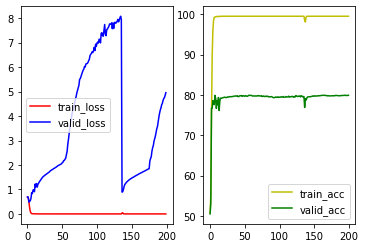

In [11]:
import os
import torch
import argparse
import numpy as np
from torch import nn
from gensim.models import word2vec
from sklearn.model_selection import train_test_split
# USE muti GPU
# torch.cuda.set_device(0)
os.environ['CUDA_VISIBLE_DEVICES'] = "0,1,3"
ids=[0,1]
# 判断gpu是否可用
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 导入日志模块 创建更漂亮的输出消息
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

# 各个data文件的路径
train_with_label = "dataset/labeledTrainData.tsv"
train_no_label = "dataset/unlabeledTrainData.tsv"
testing_data = "dataset/testData.tsv"
w2v_path = "model/w2v_all.model"

# 定义句子长度、要不要固定embedding、batch大小、epoch轮数、learning rate值、model文件路径
sen_len = 200
fix_embedding = True#训练期间固定embedding  加快训练
batch_size = 128
epoch = 200
lr = 0.001
model_dir = "model/"
print("加载数据...")
train_x,y = load_training_data(label_train_path)

# 对inputs和labels做预处理
preprocess = Preprocess(train_x,sen_len,w2v_path=w2v_path)  #实例化Preprogress类
embedding = preprocess.make_embedding(load=True)
train_x = preprocess.sentence_word2idx()
y = preprocess.labels_to_tensor(y)

# 制作一个LSTM模型对象
model = LSTM_Net(embedding,embedding_dim=250,hidden_dim=250,num_layers=1,dropout=0.5,fix_embedding=fix_embedding)
# Use Muti GPU
# model = torch.nn.DataParallel(model,device_ids=[0,1,2,3])
if torch.cuda.device_count()>1:
  print("muti gpu")
  model = torch.nn.DataParallel(model)
model.to(device) #若cuda可用
# model = model.cuda(device)
# 把data分割为训练集和验证机
p = 0.8
split_num = int(len(train_x)*p)
X_train,X_val,y_train,y_val = train_x[:split_num],train_x[split_num:],y[:split_num], y[split_num:]

# 把data做成dataset供dataloader使用
train_dataset = TwitterDataset(X=X_train,y=y_train)
val_dataset = TwitterDataset(X=X_val,y=y_val)

# 把data转成batch of tensor
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True,num_workers=12) #使用全部线程
val_loader = torch.utils.data.DataLoader(dataset=val_dataset,batch_size=batch_size,shuffle=False,num_workers=12)

# 开始训练
# training(batch_size,epoch,lr,model_dir,train_loader,val_loader,model,device)
training(batch_size, epoch, lr, model_dir, train_loader, val_loader, model, device)

加载数据...


2022-01-17 03:27:06,976 : INFO : loading Word2Vec object from model/w2v_all.model


get embedding..
加载word to vec模型


2022-01-17 03:27:08,504 : INFO : loading wv recursively from model/w2v_all.model.wv.* with mmap=None
2022-01-17 03:27:08,505 : INFO : loading syn0 from model/w2v_all.model.wv.syn0.npy with mmap=None
2022-01-17 03:27:08,562 : INFO : setting ignored attribute syn0norm to None
2022-01-17 03:27:08,563 : INFO : loading syn1neg from model/w2v_all.model.syn1neg.npy with mmap=None
2022-01-17 03:27:08,619 : INFO : setting ignored attribute cum_table to None
2022-01-17 03:27:08,621 : INFO : loaded model/w2v_all.model


total words: 121345
sentence count #25000
start training, parameter total:30838501, trainable:30838501

[ Epoch1: 157/157 ] loss:0.706 acc:8.594  
Train | Loss:0.69592 Acc: 49.602
Valid | Loss:0.69244 Acc: 50.137 
total_acc/v_batch: 0.5013671875
saving model with acc 50.137
-----------------------------------------------
[ Epoch2: 157/157 ] loss:0.635 acc:14.844 
Train | Loss:0.68067 Acc: 54.105
Valid | Loss:0.66802 Acc: 61.973 
total_acc/v_batch: 0.6197265625
saving model with acc 61.973
-----------------------------------------------
[ Epoch3: 157/157 ] loss:0.480 acc:18.750 
Train | Loss:0.54105 Acc: 74.214
Valid | Loss:0.60341 Acc: 68.320 
total_acc/v_batch: 0.683203125
saving model with acc 68.320
-----------------------------------------------
[ Epoch4: 157/157 ] loss:0.383 acc:21.094 
Train | Loss:0.28112 Acc: 89.187
Valid | Loss:0.50123 Acc: 73.750 
total_acc/v_batch: 0.7375
saving model with acc 73.750
-----------------------------------------------
[ Epoch5: 157/157 ] loss:0.

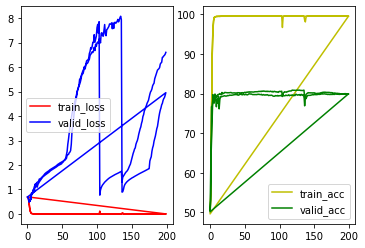

In [12]:
import os
import torch
import argparse
import numpy as np
from torch import nn
from gensim.models import word2vec
from sklearn.model_selection import train_test_split
# USE muti GPU
# torch.cuda.set_device(0)
# os.environ['CUDA_VISIBLE_DEVICES'] = '0,1,2,3'
# 判断gpu是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 导入日志模块 创建更漂亮的输出消息
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

# 各个data文件的路径
train_with_label = "dataset/labeledTrainData.tsv"
train_no_label = "dataset/unlabeledTrainData.tsv"
testing_data = "dataset/testData.tsv"
w2v_path = "model/w2v_all.model"

# 定义句子长度、要不要固定embedding、batch大小、epoch轮数、learning rate值、model文件路径
sen_len = 200
fix_embedding = True#训练期间固定embedding  加快训练
batch_size = 128
epoch = 200
lr = 0.001
model_dir = "model/"
print("加载数据...")
train_x,y = load_training_data(label_train_path)

# 对inputs和labels做预处理
preprocess = Preprocess(train_x,sen_len,w2v_path=w2v_path)  #实例化Preprogress类
embedding = preprocess.make_embedding(load=True)
train_x = preprocess.sentence_word2idx()
y = preprocess.labels_to_tensor(y)

# 制作一个LSTM模型对象
model = LSTM_Net(embedding,embedding_dim=250,hidden_dim=250,num_layers=1,dropout=0.5,fix_embedding=fix_embedding)
# Use Muti GPU
# model = torch.nn.DataParallel(model,device_ids=[0,1,2,3])
model = model.to(device) #若cuda可用

# 把data分割为训练集和验证机
p = 0.8
split_num = int(len(train_x)*p)
X_train,X_val,y_train,y_val = train_x[:split_num],train_x[split_num:],y[:split_num], y[split_num:]

# 把data做成dataset供dataloader使用
train_dataset = TwitterDataset(X=X_train,y=y_train)
val_dataset = TwitterDataset(X=X_val,y=y_val)

# 把data转成batch of tensor
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True,num_workers=12) #使用全部线程
val_loader = torch.utils.data.DataLoader(dataset=val_dataset,batch_size=batch_size,shuffle=False,num_workers=12)

# 开始训练
# training(batch_size,epoch,lr,model_dir,train_loader,val_loader,model,device)
training(batch_size, epoch, lr, model_dir, train_loader, val_loader, model, device)

In [13]:
import torch
import os
print(torch.cuda.is_available())
# USE muti GPU
torch.cuda.set_device(0)
os.environ['CUDA_VISIBLE_DEVICES'] = '0,1,2,3'
# 判断gpu是否可用
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

True
cuda:0
